# Iris Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
data=load_iris()

In [40]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [82]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df['target']=data.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Analysis

In [87]:
from pandas_profiling import ProfileReport
Report=ProfileReport(df)
Report.to_file(output_file='Analysis_Iris.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [13]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

In [10]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

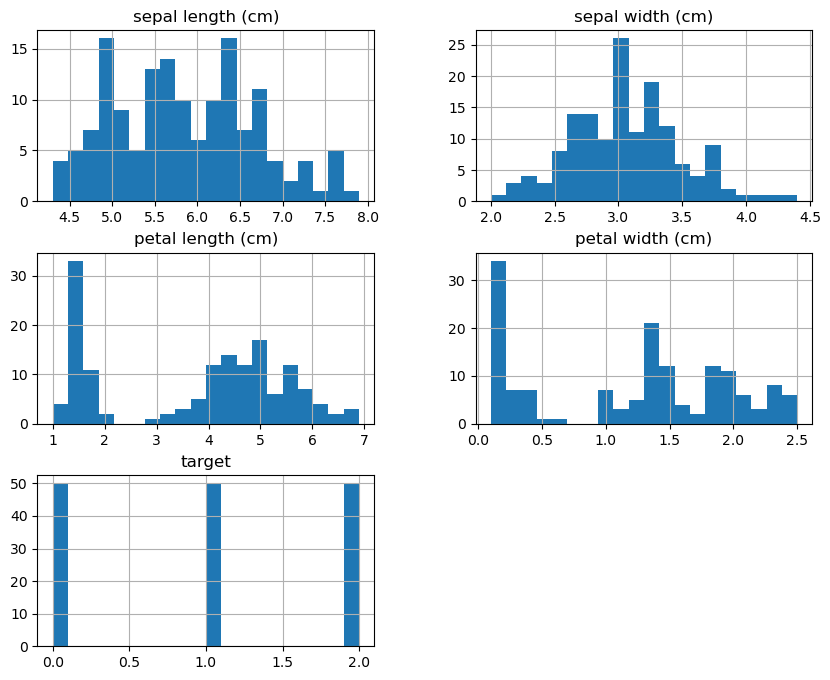

In [17]:
df.hist(bins=20,figsize=(10,8))
plt.show()

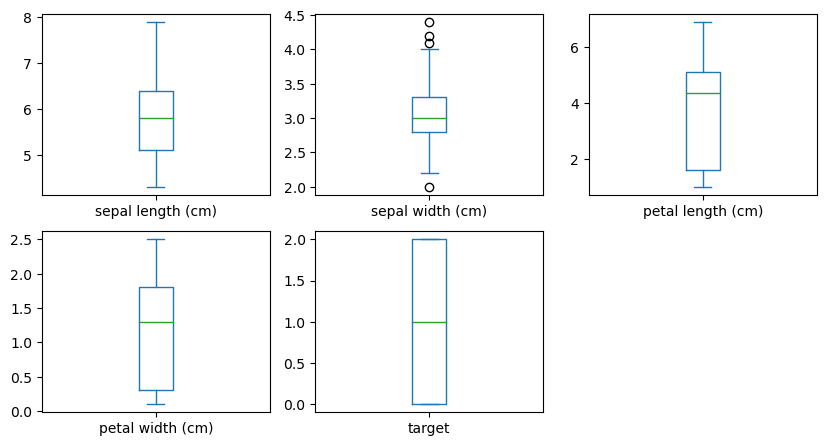

In [24]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,8))
plt.show()

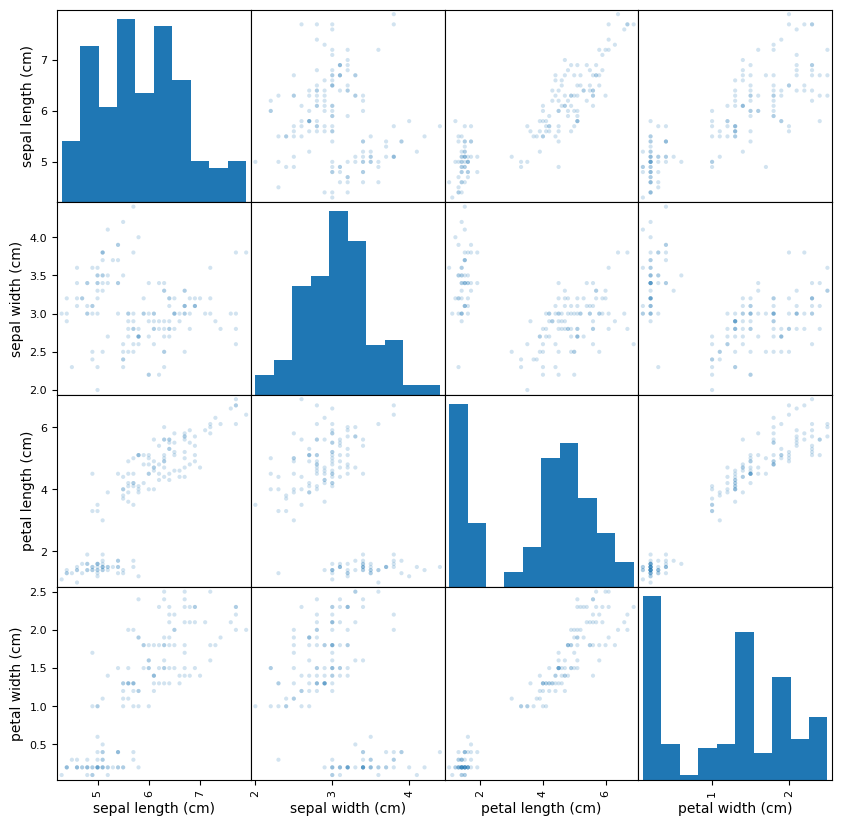

In [37]:
pd.plotting.scatter_matrix(df.iloc[:,:-1],alpha=0.2,figsize=(10,10))
plt.show()

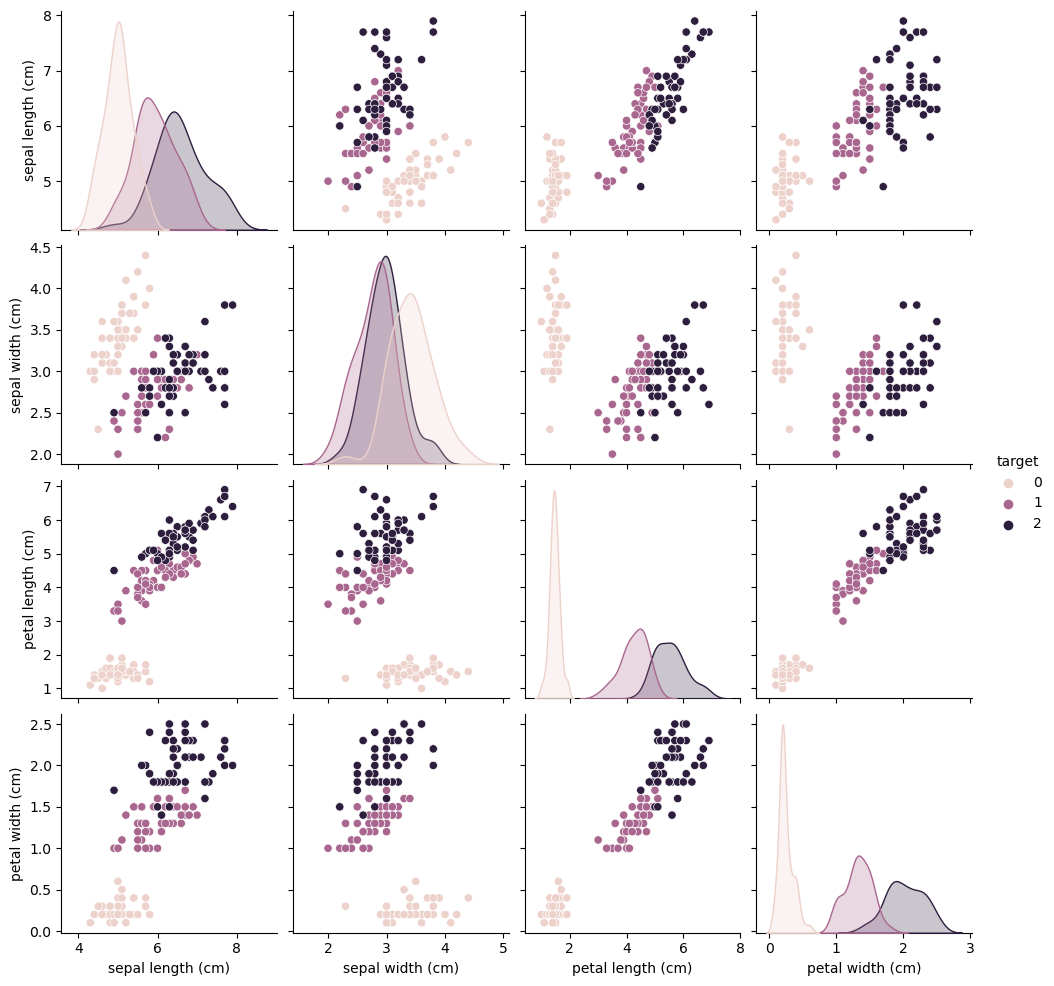

In [38]:
# Pair plot looks good and with target
sns.pairplot(df,hue='target')
plt.show()

## train_test

In [50]:
x=data.data
y=data.target

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=15)

In [52]:
print(f'x_train {x_train.shape}')
print(f'x_test {x_test.shape}')
print(f'y_train {y_train.shape}')
print(f'y_test {y_test.shape}' )

x_train (120, 4)
x_test (30, 4)
y_train (120,)
y_test (30,)


## GaussianNB

In [53]:
from sklearn.naive_bayes import GaussianNB
iris=GaussianNB()
iris.fit(x_train,y_train)

GaussianNB()

## Prediction

In [57]:
y_pred=iris.predict(x_test)

## Accuracy

In [64]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)

In [68]:
iris.score(x_test,y_test)

1.0

In [69]:
cm

array([[ 8,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  9]], dtype=int64)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

